<a href="https://colab.research.google.com/github/vaishnavi2460/jupyternotebook/blob/main/sparktask1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NAME: V.VAISHNAVI

**TASK ONE**: STUDENTS SCORE PREDICTION.
Predict the percentage of an student based on the no. of study hours.

**ALGORITHM USED**: Simple Linear Regression

In [ ]:
#importing the suitable libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [ ]:
# Reading data from the link having data sets
url = "http://bit.ly/w-data"
df= pd.read_csv(url)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


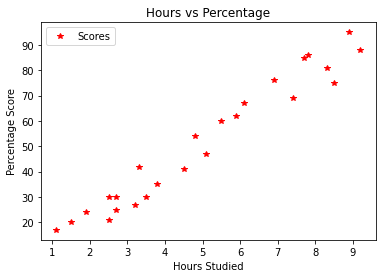

In [ ]:
# Plotting the scores
df.plot(x='Hours', y='Scores', style='*',color='red')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [ ]:
#divide the data into "attributes" (inputs) and "labels" (outputs).
x= df.iloc[:, :-1].values  
y= df.iloc[:, 1].values  

In [ ]:
print(x)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [ ]:
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


# **split this x and y into training and testing sets by importing train_test_split method from scikit**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#planning to keep train by test ratio as 80:20 or 8:2
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_prdc= regressor.predict(x_test)

In [ ]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_prdc})  
display(df1)

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


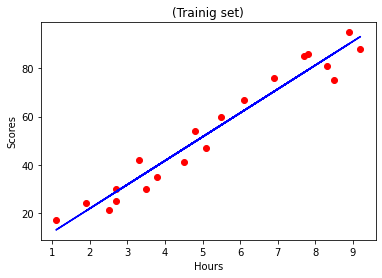

In [ ]:
plt.scatter(x_train,y_train, color='red')
plt.plot(x_train,regressor.predict(x_train),color='blue')
plt.title('(Trainig set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [ ]:
#Calculating the coeffeciants of the simple linear regression equation: y = C0 + C1.x (C1: Is the Slope, C0:Is the Intercept)

mean_x = np.mean(df['Hours'])
mean_y = np.mean(df['Scores'])
num = 0
den = 0
x = list(df['Hours'])
y = list(df['Scores'])
for i in range(len(df)):
    num += (x[i]-mean_x)*(y[i]-mean_y)
    den += (x[i]-mean_x)**2
B1 = num/den
B0 = mean_y - B1*mean_x

In [ ]:
df['Predicted Score'] = B0 + B1*df['Hours']
df

,Hours,Scores,Predicted Score
0,2.5,21,26.923182
1,5.1,47,52.340271
2,3.2,27,33.766244
3,8.5,75,85.578002
4,3.5,30,36.698985
5,1.5,20,17.147378
6,9.2,88,92.421065
7,5.5,60,56.250592
8,8.3,81,83.622842
9,2.7,25,28.878343


[]

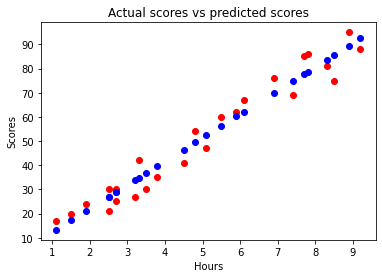

In [ ]:
plt.scatter(df['Hours'], df['Scores'], c='red', label='Aactual Marks')
plt.scatter(df['Hours'], df['Predicted Score'], c='blue', label='Predected Marks')
plt.title('Actual scores vs predicted scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.plot()

In [ ]:
y = B0 + B1*7.4
print("Marks scored by the student who study 9.25 hours a day is ",y)

Marks scored by the student who study 9.25 hours a day is  74.8246184972005


In [ ]:
df.sort_values(by = 'Hours', ascending=True)

,Hours,Scores,Predicted Score
14,1.1,17,13.237057
5,1.5,20,17.147378
17,1.9,24,21.057700
0,2.5,21,26.923182
16,2.5,30,26.923182
20,2.7,30,28.878343
9,2.7,25,28.878343
2,3.2,27,33.766244
13,3.3,42,34.743825
4,3.5,30,36.698985


In [ ]:
pass1 =  (df['Scores']>=40)
df.loc[pass1]

,Hours,Scores,Predicted Score
1,5.1,47,52.340271
3,8.5,75,85.578002
6,9.2,88,92.421065
7,5.5,60,56.250592
8,8.3,81,83.622842
10,7.7,85,77.757360
11,5.9,62,60.160913
12,4.5,41,46.474789
13,3.3,42,34.743825
15,8.9,95,89.488324


In [ ]:
count1=df.loc[pass1].shape[0]
print(count1)

15


In [ ]:
pass2=df['Predicted Score']>=40
df.loc[pass2]

,Hours,Scores,Predicted Score
1,5.1,47,52.340271
3,8.5,75,85.578002
6,9.2,88,92.421065
7,5.5,60,56.250592
8,8.3,81,83.622842
10,7.7,85,77.757360
11,5.9,62,60.160913
12,4.5,41,46.474789
15,8.9,95,89.488324
18,6.1,67,62.116074


In [ ]:
count2=df.loc[pass2].shape[0]
print(count2)

14


In [ ]:
if count1<count2:
  print("good improvement")
else:
  print("needs some improvement")

needs some improvement
